In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from yellowbrick.classifier import ClassPredictionError

from sklearn.model_selection import GridSearchCV # Поиск по решетке
from sklearn.model_selection import cross_val_score # оценка кросс-валидации
from sklearn.model_selection import cross_validate # кросс-валидация

# Подготовка данных

In [ ]:
from sklearn import datasets
data = datasets.load_breast_cancer()
#print(data.DESCR)

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Информация о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
x = data.data
y = data.target
print(df['target'].value_counts())
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y)

1    357
0    212
Name: target, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[-0.89268307 -0.42470114 -0.86918142 ... -0.29161018 -0.98885674
  -0.13242859]
 [ 0.80776239 -0.09083638  0.85511677 ...  2.09264046  0.31933771
   0.2801952 ]
 [ 1.55607009  0.07838275  1.5551956  ...  2.03750974 -0.25499156
   2.34015225]
 ...
 [-0.80891729  0.08066949 -0.84854326 ... -1.36803755 -0.56130051
  -0.48286896]
 [ 0.15438926  0.4831366   0.1327811  ...  1.0068715   1.25900422
   1.27038689]
 [ 1.50022623  2.97111508  1.44593474 ...  0.68680702 -0.31242449
  -0.50658297]]


# Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(X_train, y_train)
y_pred=LogisticRegressionModel.predict(X_test)

print('precision_score:', metrics.precision_score(y_test, y_pred))
print('f1_score:', metrics.f1_score(y_test, y_pred))
print('Accuracy score:', metrics.accuracy_score(y_test, y_pred))

precision_score: 0.9666666666666667
f1_score: 0.9666666666666667
Accuracy score: 0.958041958041958


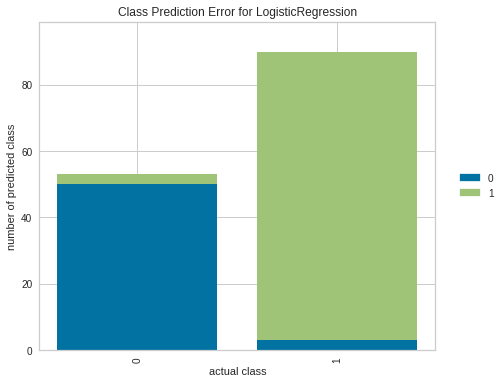

In [ ]:
oz = ClassPredictionError(LogisticRegression())
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.show()

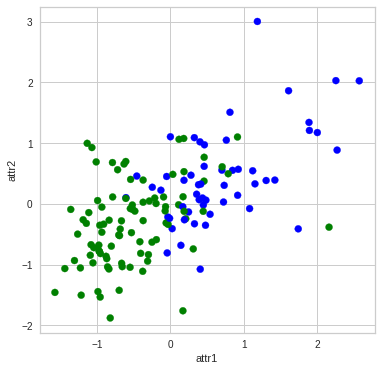

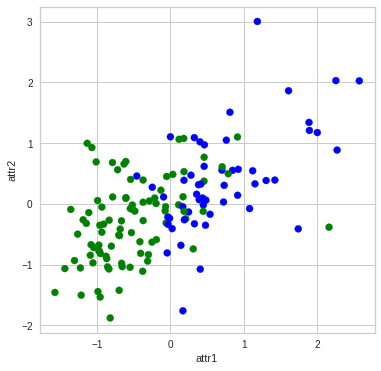

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
fig,ay= plt.subplots(figsize=(6,6))

ax.scatter(X_test[:, 5], X_test[:, 8],
c=np.where(y_pred,'green','blue'))
ax.set_xlabel('attr1')
ax.set_ylabel('attr2')
ay.scatter(X_test[:, 5], X_test[:, 8],
c=np.where(y_test,'green','blue'))
ay.set_xlabel('attr1')
ay.set_ylabel('attr2')
plt.show()

In [ ]:
LogisticRegressionModel.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [ ]:
LinRegresModel=LogisticRegression()
parameters = { 'penalty':['l1', 'l2', 'elasticnet', None],
               'C':[1,10,100],
              'tol':[1e-5,1e-4,1e-3],
              'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']}
scoring_param = {'accuracy','f1','precision'}
gscv = GridSearchCV(LogisticRegressionModel, parameters,scoring=scoring_param,refit='accuracy', return_train_score=True)
gscv.fit(x,y)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky'],
                         'tol': [1e-05, 0.0001, 0.001]},
             refit='accuracy', return_train_score=True,
             scoring={'precision', 'f1', 'accuracy'})

In [ ]:
print('best parameters:', gscv.best_params_)
print('best score:', gscv.best_score_)

best parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05}
best score: 0.9701443875174662


In [ ]:
CVLRM=gscv.best_estimator_
CVLRM.fit(X_train,y_train)
y_pred=CVLRM.predict(X_test)

print('precision_score:', metrics.precision_score(y_test, y_pred))
print('f1_score:', metrics.f1_score(y_test, y_pred))
print('Accuracy score:', metrics.accuracy_score(y_test, y_pred))

precision_score: 0.9651162790697675
f1_score: 0.9431818181818181
Accuracy score: 0.9300699300699301


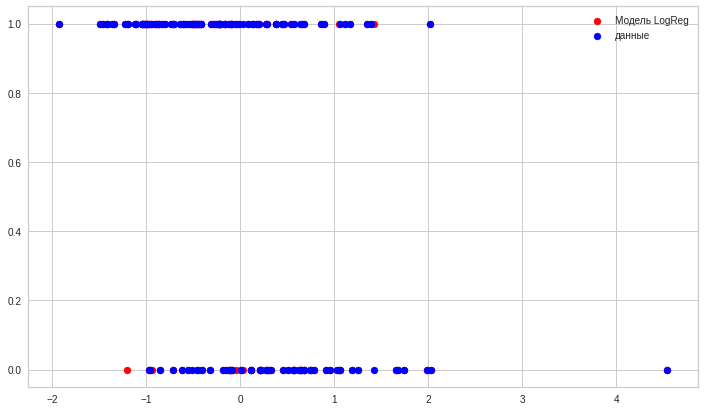

In [ ]:
param_num=1
x_reg = X_test[:,param_num]
y_reg = y_pred

fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(x_reg,y_reg,color='red',
        label='Модель LogReg')
ax.scatter(X_test[:,param_num],y_test,
           color='blue', label='данные')
ax.legend()
plt.show()

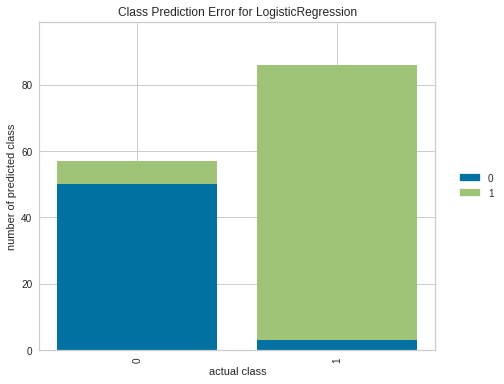

In [ ]:
oz = ClassPredictionError(CVLRM)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.show()

# Гребневый классификатор

In [ ]:
from sklearn.linear_model import RidgeClassifier
RidgeClassifierModel = RidgeClassifier(alpha=1.0)
RidgeClassifierModel.fit(X_train, y_train)
y_pred=RidgeClassifierModel.predict(X_test)

print('precision_score:', metrics.precision_score(y_test, y_pred))
print('f1_score:', metrics.f1_score(y_test, y_pred))
print('Accuracy score:', metrics.accuracy_score(y_test, y_pred))

precision_score: 0.9574468085106383
f1_score: 0.9782608695652174
Accuracy score: 0.972027972027972


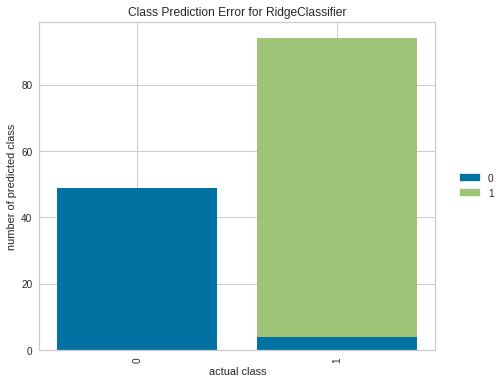

In [ ]:
oz = ClassPredictionError(RidgeClassifier())
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.show()

In [ ]:
RidgeClassifierModel.get_params().keys()

dict_keys(['alpha', 'class_weight', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'random_state', 'solver', 'tol'])

In [ ]:
RidgeClassifierModel=RidgeClassifier()
parameters = {'alpha':[1,5,10,100],
              'tol':[1e-5,1e-4,1e-3],
              'solver':['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}
scoring_param = {'accuracy','f1','precision'}
gscv = GridSearchCV(RidgeClassifierModel, parameters,scoring=scoring_param,refit='accuracy', return_train_score=True)
gscv.fit(x,y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

GridSearchCV(estimator=RidgeClassifier(),
             param_grid={'alpha': [1, 5, 10, 100],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga', 'lbfgs'],
                         'tol': [1e-05, 0.0001, 0.001]},
             refit='accuracy', return_train_score=True,
             scoring={'precision', 'f1', 'accuracy'})

In [ ]:
print('best parameters:', gscv.best_params_)
print('best score:', gscv.best_score_)

best parameters: {'alpha': 1, 'solver': 'svd', 'tol': 1e-05}
best score: 0.9543549138332557


In [ ]:
CVRM=gscv.best_estimator_
CVRM.fit(X_train,y_train)
y_pred=CVRM.predict(X_test)

print('precision_score:', metrics.precision_score(y_test, y_pred))
print('f1_score:', metrics.f1_score(y_test, y_pred))
print('Accuracy score:', metrics.accuracy_score(y_test, y_pred))

precision_score: 0.9574468085106383
f1_score: 0.9782608695652174
Accuracy score: 0.972027972027972


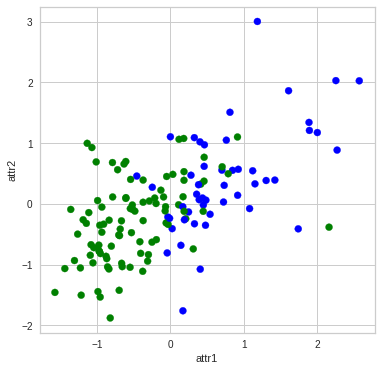

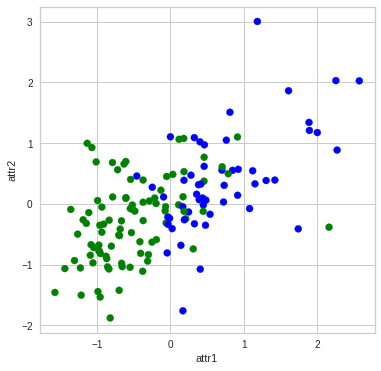

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
fig,ay= plt.subplots(figsize=(6,6))

ax.scatter(X_test[:, 5], X_test[:, 8],
c=np.where(y_pred,'green','blue'))
ax.set_xlabel('attr1')
ax.set_ylabel('attr2')
ay.scatter(X_test[:, 5], X_test[:, 8],
c=np.where(y_test,'green','blue'))
ay.set_xlabel('attr1')
ay.set_ylabel('attr2')
plt.show()

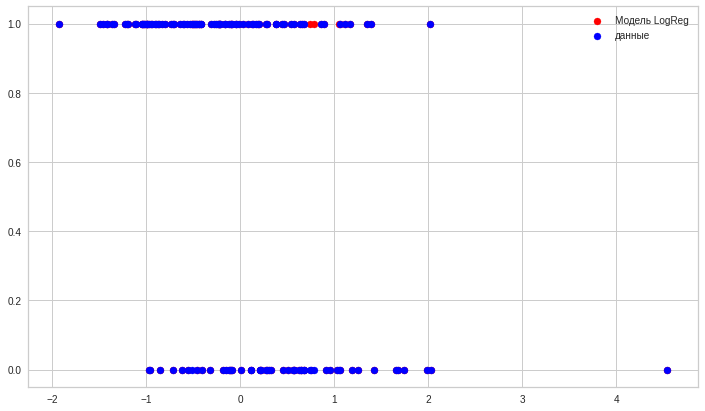

In [ ]:
param_num=1
x_reg = X_test[:,param_num]
y_reg = y_pred

fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(x_reg,y_reg,color='red',
        label='Модель LogReg')
ax.scatter(X_test[:,param_num],y_test,
           color='blue', label='данные')
ax.legend()
plt.show()

# SGDClassifier Градиентный спуск

In [ ]:
from sklearn.linear_model import SGDClassifier
SGDClassifierModel = SGDClassifier(alpha=1.0)
SGDClassifierModel.fit(X_train, y_train)
y_pred=SGDClassifierModel.predict(X_test)

print('precision_score:', metrics.precision_score(y_test, y_pred))
print('f1_score:', metrics.f1_score(y_test, y_pred))
print('Accuracy score:', metrics.accuracy_score(y_test, y_pred))

precision_score: 0.9375
f1_score: 0.967741935483871
Accuracy score: 0.958041958041958


In [ ]:
SGDClassifierModel.get_params()

{'alpha': 1.0,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

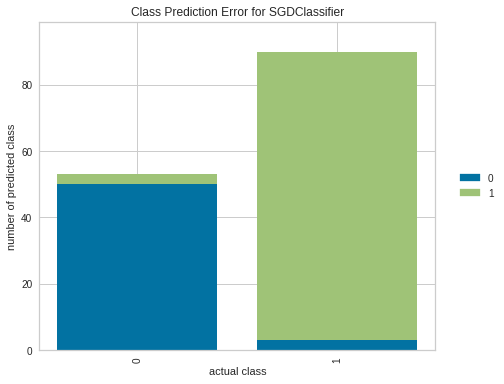

In [ ]:
oz = ClassPredictionError(SGDClassifier())
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.show()

In [ ]:
SGDClassifierModel.get_params().keys()

dict_keys(['alpha', 'average', 'class_weight', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'n_jobs', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [ ]:
SGDClassifierModel=SGDClassifier()
parameters = {'alpha':[0.0001,0.001,0.01,1,10],
              'tol':[1e-5,1e-4,1e-3],
              'epsilon':[0,0.1,1,10],
              'penalty':['l1', 'l2', 'elasticnet', None],
              'loss':['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron']}
scoring_param = {'accuracy','f1','precision'}
gscv = GridSearchCV(SGDClassifierModel, parameters,scoring=scoring_param,refit='accuracy', return_train_score=True)
gscv.fit(x,y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_grad

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 1, 10],
                         'epsilon': [0, 0.1, 1, 10],
                         'loss': ['hinge', 'log_loss', 'modified_huber',
                                  'squared_hinge', 'perceptron'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'tol': [1e-05, 0.0001, 0.001]},
             refit='accuracy', return_train_score=True,
             scoring={'precision', 'f1', 'accuracy'})

In [ ]:
print('best parameters:', gscv.best_params_)
print('best score:', gscv.best_score_)

best parameters: {'alpha': 0.0001, 'epsilon': 1, 'loss': 'squared_hinge', 'penalty': 'l1', 'tol': 0.0001}
best score: 0.924406148113647


In [ ]:
CVSGDM=gscv.best_estimator_
CVSGDM.fit(X_train,y_train)
y_pred=CVSGDM.predict(X_test)

print('precision_score:', metrics.precision_score(y_test, y_pred))
print('f1_score:', metrics.f1_score(y_test, y_pred))
print('Accuracy score:', metrics.accuracy_score(y_test, y_pred))

precision_score: 0.9655172413793104
f1_score: 0.9491525423728815
Accuracy score: 0.9370629370629371


In [ ]:
gscv.best_estimator_.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l1',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

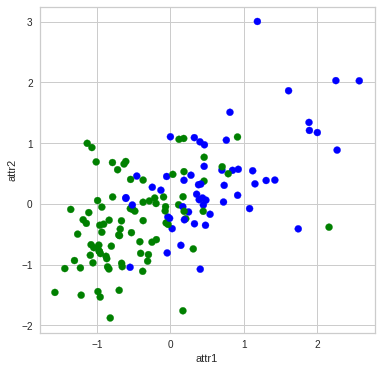

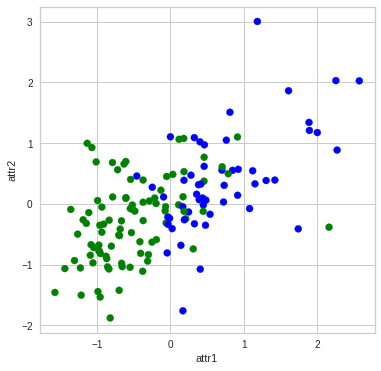

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
fig,ay= plt.subplots(figsize=(6,6))

ax.scatter(X_test[:, 5], X_test[:, 8],
c=np.where(y_pred,'green','blue'))
ax.set_xlabel('attr1')
ax.set_ylabel('attr2')
ay.scatter(X_test[:, 5], X_test[:, 8],
c=np.where(y_test,'green','blue'))
ay.set_xlabel('attr1')
ay.set_ylabel('attr2')
plt.show()

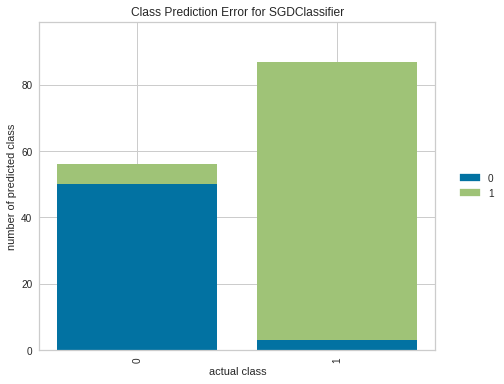

In [ ]:
oz = ClassPredictionError(CVSGDM)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.show()

# Деревья решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTCModel = DecisionTreeClassifier()
DTCModel.fit(X_train, y_train)
y_pred=DTCModel.predict(X_test)

print('precision_score:', metrics.precision_score(y_test, y_pred))
print('f1_score:', metrics.f1_score(y_test, y_pred))
print('Accuracy score:', metrics.accuracy_score(y_test, y_pred))

precision_score: 0.9213483146067416
f1_score: 0.9162011173184358
Accuracy score: 0.8951048951048951


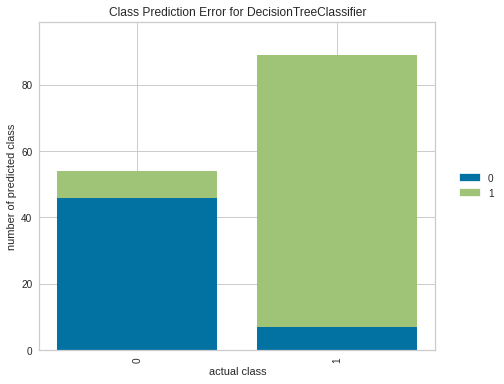

In [ ]:
oz = ClassPredictionError(DTCModel)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.show()

In [ ]:
DTCModel.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [ ]:
DTCModel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
DTCModel=DecisionTreeClassifier()
parameters = {'splitter':['best', 'random'],
              'criterion':['gini', 'entropy', 'log_loss'],
              'min_samples_split':[2,3,5],
              'min_samples_leaf':[1,2,3]}
scoring_param = {'accuracy','f1','precision'}
gscv = GridSearchCV(DTCModel, parameters,scoring=scoring_param,refit='accuracy', return_train_score=True)
gscv.fit(x,y)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFaile

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 5],
                         'splitter': ['best', 'random']},
             refit='accuracy', return_train_score=True,
             scoring={'precision', 'f1', 'accuracy'})

In [ ]:
print('best parameters:', gscv.best_params_)
print('best score:', gscv.best_score_)

best parameters: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
best score: 0.9489986027014439


In [ ]:
CVDTCM=gscv.best_estimator_
CVDTCM.fit(X_train,y_train)
y_pred=CVDTCM.predict(X_test)

print('precision_score:', metrics.precision_score(y_test, y_pred))
print('f1_score:', metrics.f1_score(y_test, y_pred))
print('Accuracy score:', metrics.accuracy_score(y_test, y_pred))

precision_score: 0.9759036144578314
f1_score: 0.9364161849710982
Accuracy score: 0.9230769230769231


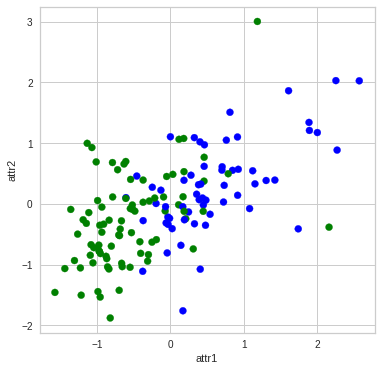

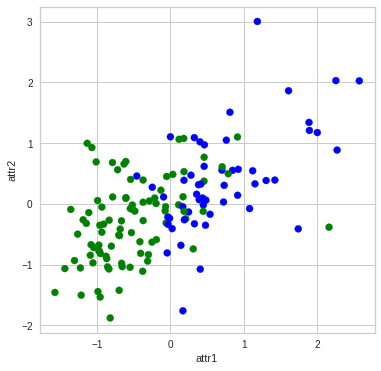

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
fig,ay= plt.subplots(figsize=(6,6))

ax.scatter(X_test[:, 5], X_test[:, 8],
c=np.where(y_pred,'green','blue'))
ax.set_xlabel('attr1')
ax.set_ylabel('attr2')
ay.scatter(X_test[:, 5], X_test[:, 8],
c=np.where(y_test,'green','blue'))
ay.set_xlabel('attr1')
ay.set_ylabel('attr2')
plt.show()

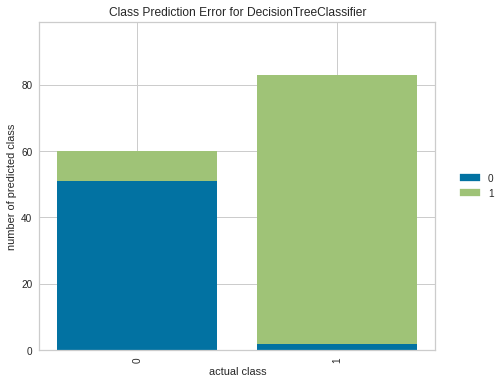

In [ ]:
oz = ClassPredictionError(CVDTCM)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.show()

# Байесовский классификатор

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNBModel = GaussianNB()
GNBModel.fit(X_train, y_train)
y_pred=GNBModel.predict(X_test)

print('precision_score:', metrics.precision_score(y_test, y_pred))
print('f1_score:', metrics.f1_score(y_test, y_pred))
print('Accuracy score:', metrics.accuracy_score(y_test, y_pred))

precision_score: 0.9560439560439561
f1_score: 0.9613259668508287
Accuracy score: 0.951048951048951


In [ ]:
GNBModel.get_params()

{'priors': None, 'var_smoothing': 1e-09}

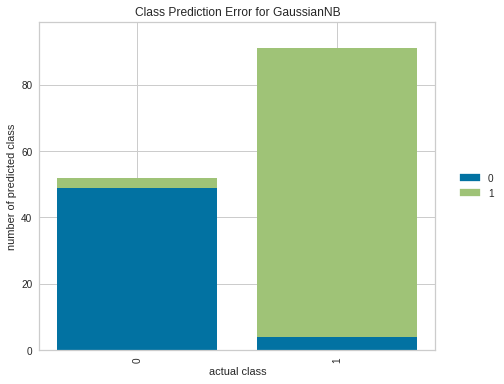

In [ ]:
oz = ClassPredictionError(GNBModel)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.show()

In [ ]:
GNBModel.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [ ]:
GNBModel=GaussianNB()
parameters = {'var_smoothing':[1e-10,1e-9,1e-8,1e-5,1e-3,1e-1,10]}
scoring_param = {'accuracy','f1','precision'}
gscv = GridSearchCV(GNBModel, parameters,scoring=scoring_param,refit='precision', return_train_score=True)
gscv.fit(x,y)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-10, 1e-09, 1e-08, 1e-05, 0.001,
                                           0.1, 10]},
             refit='precision', return_train_score=True,
             scoring={'precision', 'f1', 'accuracy'})

In [ ]:
print('best parameters:', gscv.best_params_)
print('best score:', gscv.best_score_)

best parameters: {'var_smoothing': 1e-10}
best score: 0.9398841279915449


In [ ]:
CVGNBM=gscv.best_estimator_
CVGNBM.fit(X_train,y_train)
y_pred=CVGNBM.predict(X_test)

print('precision_score:', metrics.precision_score(y_test, y_pred))
print('f1_score:', metrics.f1_score(y_test, y_pred))
print('Accuracy score:', metrics.accuracy_score(y_test, y_pred))

precision_score: 0.9560439560439561
f1_score: 0.9613259668508287
Accuracy score: 0.951048951048951


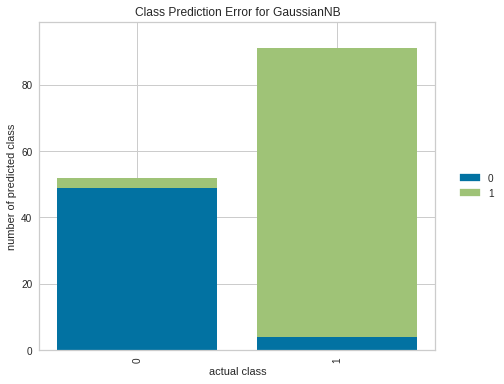

In [ ]:
oz = ClassPredictionError(CVGNBM)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.show()

# Ансамбль моделей

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

In [ ]:
LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(X_train, y_train)
LRM_score=LogisticRegressionModel.score(X_test,y_test)
LRM_score

0.958041958041958

In [ ]:
RidgeClassifierModel = RidgeClassifier()
RidgeClassifierModel.fit(X_train, y_train)
RCM_score=RidgeClassifierModel.score(X_test,y_test)
RCM_score

0.972027972027972

In [ ]:
SGDClassifierModel = SGDClassifier()
SGDClassifierModel.fit(X_train, y_train)
SGDCM_score=SGDClassifierModel.score(X_test,y_test)
SGDCM_score

0.951048951048951

In [ ]:
print('LogisticRegression: {}'.format(LRM_score))
print('RidgeClassifier: {}'.format(RCM_score))
print('SGDClassifier: {}'.format(SGDCM_score))

LogisticRegression: 0.958041958041958
RidgeClassifier: 0.972027972027972
SGDClassifier: 0.951048951048951


In [ ]:
model_mean = np.mean([LRM_score, RCM_score, SGDCM_score])
print('model mean: {}'.format(model_mean))

model mean: 0.9603729603729603


## Bagging

In [ ]:
LRM_bg=BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=15, max_samples=0.75)
LRM_bg.fit(X_train, y_train)
LRM_bg_score=LRM_bg.score(X_test,y_test)
print("LM score =", LRM_score)
print("Bagging LM =", LRM_bg_score)

LM score = 0.958041958041958
Bagging LM = 0.951048951048951


In [ ]:
RCM_bg=BaggingClassifier(base_estimator=RidgeClassifier(), n_estimators=15, max_samples=0.75)
RCM_bg.fit(X_train, y_train)
RCM_bg_score=RCM_bg.score(X_test,y_test)
print("LaM score =", RCM_score)
print("Bagging LaM =", RCM_bg_score)

LaM score = 0.972027972027972
Bagging LaM = 0.972027972027972


In [ ]:
SGDCM_bg=BaggingClassifier(base_estimator=SGDClassifier(), n_estimators=15, max_samples=0.75)
SGDCM_bg.fit(X_train, y_train)
SGDCM_bg_score=SGDCM_bg.score(X_test,y_test)
print("RM score =", SGDCM_score)
print("Bagging RM =", SGDCM_bg_score)

RM score = 0.951048951048951
Bagging RM = 0.958041958041958


In [ ]:
print('Bagging LM: {}'.format(LRM_bg_score))
print('Bagging LaM: {}'.format(RCM_bg_score))
print('Bagging RM: {}'.format(SGDCM_bg_score))

Bagging LM: 0.951048951048951
Bagging LaM: 0.972027972027972
Bagging RM: 0.958041958041958


In [ ]:
model_bg_mean = np.mean([LRM_bg_score, RCM_bg_score, SGDCM_bg_score])
print('bagging model mean: {}'.format(model_bg_mean))

bagging model mean: 0.9603729603729603


## Voting

In [ ]:
# список моделей - пары (имя, ссылка)
estimators=[('Bagging LogisticRegression', LRM_bg), ('Bagging RidgeClassifier', RCM_bg), ('Bagging SGDClassifier', SGDCM_bg)]
# создадим ансамбль
ensemble = VotingClassifier(estimators, voting='hard')
# обучим ансамбль на обучающей выборке
ensemble.fit(X_train, y_train)
# оценка на тестовой выборке
print('model mean: {}'.format(model_mean))
print('voting : {}'.format(ensemble.score(X_test, y_test)))

model mean: 0.9603729603729603
voting : 0.958041958041958


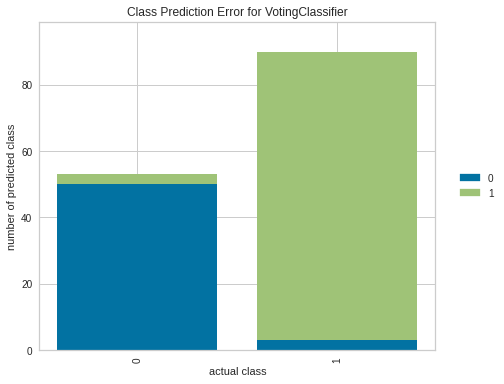

In [ ]:
oz = ClassPredictionError(ensemble)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.show()

## Stacking

In [ ]:
estimators=[('Bagging LogisticRegression', LRM_bg), ('Bagging RidgeClassifier', RCM_bg), ('Bagging SGDClassifier', SGDCM_bg)]
meta_clf_bg = StackingClassifier(estimators=estimators)
meta_clf_bg.fit(X_train, y_train)
print('bagging model mean: {}'.format(model_bg_mean))
print('voting: {}'.format(ensemble.score(X_test, y_test)))
print('stacking: {}'.format(meta_clf_bg.score(X_test, y_test)))

bagging model mean: 0.9603729603729603
voting: 0.958041958041958
stacking: 0.951048951048951


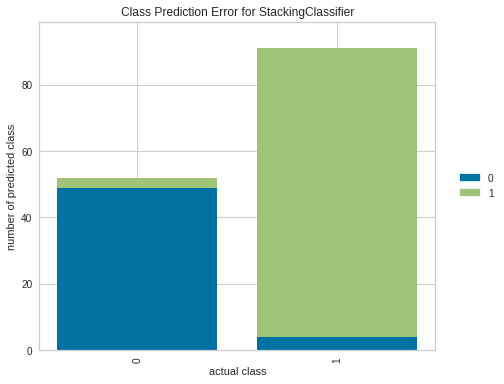

In [ ]:
oz = ClassPredictionError(meta_clf_bg)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.show()